In [1]:
# THE USEFULNESS OF THIS CELL IS TO IMPORT ALL NECESSARY LIBRARIES

import pandas as pd                                                                     
import numpy as np                                                                      
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# THE USEFULNESS OF THIS CELL IS TO READ THE REQUIRED FILE AND DISPLAY FIRST 10 ROWS

loan_data=pd.read_excel("loan-predictionUC.csv.xlsx")       
df=pd.DataFrame(loan_data)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# the usefulness of this cell is to know the unique values in each column

loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          5
Loan_Status            2
dtype: int64

In [4]:
#the usefulness of this cell is to remove the error found so that it does treat same spell value as different 

loan_data['Property_Area'] = loan_data['Property_Area'].str.lower().str.replace('-', '')

In [5]:
# the usefulness of this cell is to know the unique values in each column and to check the result 
#after previous performed action

loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
# THE USEFULNESS OF THIS CELL IS TO GET INFORMATION OF WHOLE DATA ;i.e.TO KNOW TOTAL NUMBER OF ROWS AND COLUMNS
# TO KNOW THE COUNT OF NON_NULL VALUES AND THE DATA TYPE OF EACH COLUMN

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# THE USEFULNESS OF THIS CELL IS TO KNOW THE TOTAL NULL VALUES IN EACH COLUMN

loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# THE USEFULNESS OF THIS CELL IS TO know all the values that can be calculated from data
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Boxplot


<Axes: >

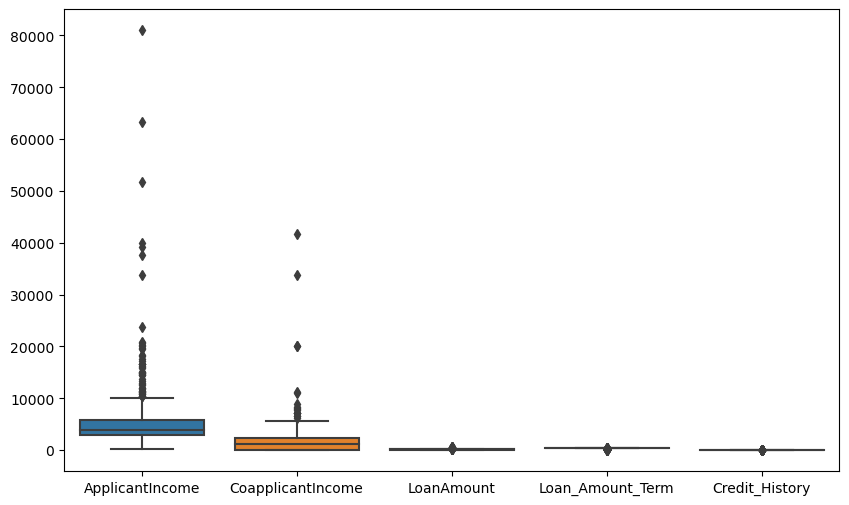

In [9]:
# THE USEFULNESS OF THIS CELL IS TO PLOT BOXPLOT TO IDENTIFY OUTLIERS IN NUMERICAL VALUES

print("Boxplot")
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data)

In [10]:
# THE USEFULNESS OF THIS CELL IS TO FILL NULL VALUES OF NUMERIC DATA

loan_data["LoanAmount"]=loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].median())
loan_data["Loan_Amount_Term"]=loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mean())
loan_data["Credit_History"]=loan_data["Credit_History"].fillna(loan_data["Credit_History"].median())

In [11]:
# THE USEFULNESS OF THIS CELL IS TO FILL NULL VALUES OF CATEGORICAL DATA

loan_data["Gender"]=loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Dependents"]=loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Married"]=loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Self_Employed"]=loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])

In [12]:
# THE USEFULNESS OF THIS CELL IS TO CONFIRM ALL NULL VALUES ARE FILLED AND EACH COLUMN HAS "ZERO" NULL VALUES

loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

number of people who applied for loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


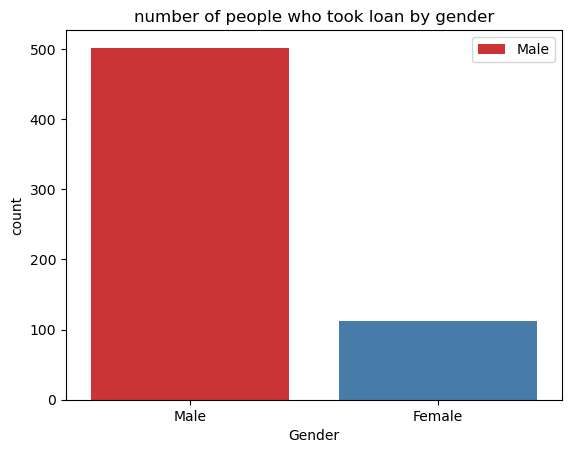

In [13]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPLIED ON BASIS OF GENDER
print("number of people who applied for loan by gender")
print(loan_data["Gender"].value_counts())
plt.title("number of people who took loan by gender")
sns.countplot(x="Gender",data=loan_data,palette="Set1")
plt.legend(labels=["Male","Female"])

Number of people who applied for loan by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


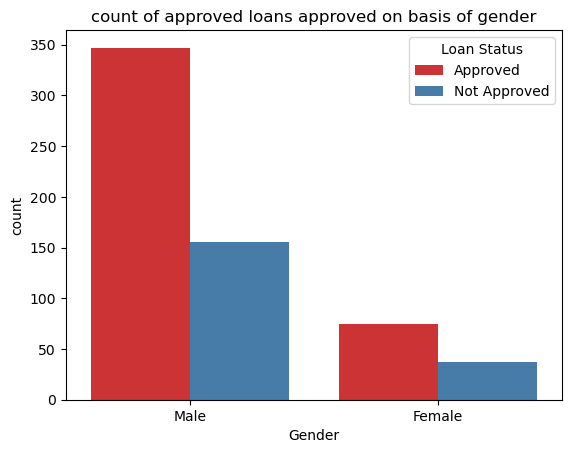

In [14]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPROVED ON BASIS OF GENDER
print("Number of people who applied for loan by gender:")
print(loan_data["Gender"].value_counts())
plt.title("count of approved loans approved on basis of gender")
sns.countplot(x="Gender", hue="Loan_Status", data=loan_data, palette="Set1")
plt.legend(title="Loan Status", labels=["Approved", "Not Approved"])
plt.show()

number of MARRIED people who applied for loan 
Married
Yes    401
No     213
Name: count, dtype: int64


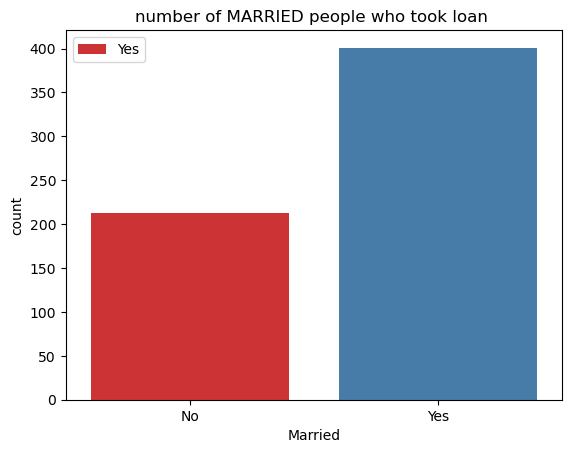

In [15]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPLIED ON BASIS OF MARITAL_STATUS

print("number of MARRIED people who applied for loan ")
print(loan_data["Married"].value_counts())
plt.title("number of MARRIED people who took loan ")
sns.countplot(x="Married",data=loan_data,palette="Set1")
plt.legend(labels=["Yes","No"])

Number of people who applied for loan by Marital_Status:
Married
Yes    401
No     213
Name: count, dtype: int64


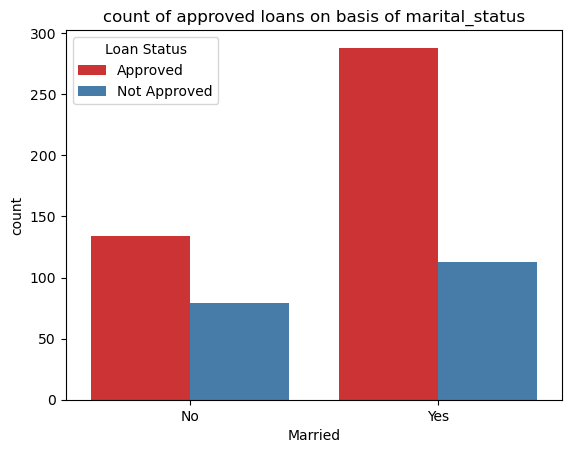

In [16]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPROVED ON BASIS OF MARITAL_STATUS
print("Number of people who applied for loan by Marital_Status:")
print(loan_data["Married"].value_counts())
plt.title("count of approved loans on basis of marital_status")
sns.countplot(x="Married", hue="Loan_Status", data=loan_data, palette="Set1")
plt.legend(title="Loan Status", labels=["Approved", "Not Approved"])
plt.show()

number of EDUCATED people who applied for loan 
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


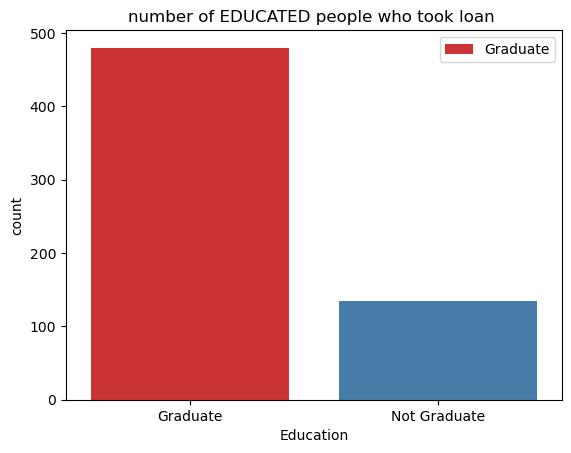

In [17]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPLIED ON BASIS OF EDUCATION
print("number of EDUCATED people who applied for loan ")
print(loan_data["Education"].value_counts())
plt.title("number of EDUCATED people who took loan ")
sns.countplot(x="Education",data=loan_data,palette="Set1")
plt.legend(labels=["Graduate","Not Graduate"])

Number of people who applied for loan by Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


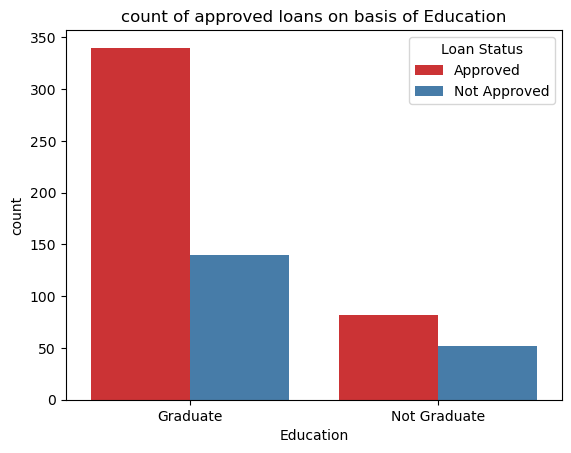

In [18]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPROVED ON BASIS OF EDUCATION
print("Number of people who applied for loan by Education:")
print(loan_data["Education"].value_counts())
plt.title("count of approved loans on basis of Education")
sns.countplot(x="Education", hue="Loan_Status", data=loan_data, palette="Set1")
plt.legend(title="Loan Status", labels=["Approved", "Not Approved"])
plt.show()

number of people who applied for loan and their property location
Property_Area
semiurban    233
urban        202
rural        179
Name: count, dtype: int64


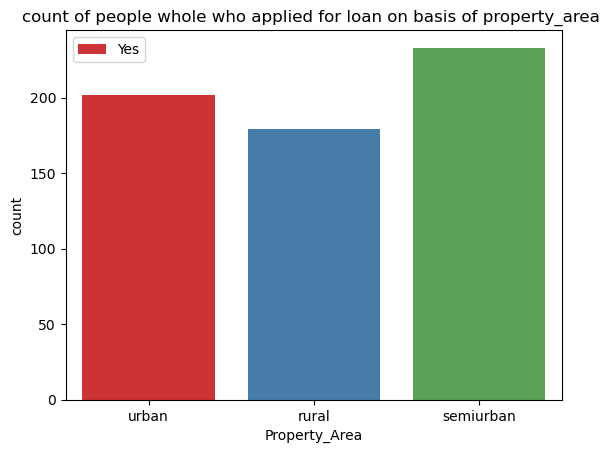

In [19]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPLIED ON BASIS OF property_area

print("number of people who applied for loan and their property location")
print(loan_data["Property_Area"].value_counts())
plt.title("count of people whole who applied for loan on basis of property_area ")
sns.countplot(x="Property_Area",data=loan_data,palette="Set1")
plt.legend(labels=["Yes","No"])

Number of people who applied for loan and their property location:
Property_Area
semiurban    233
urban        202
rural        179
Name: count, dtype: int64


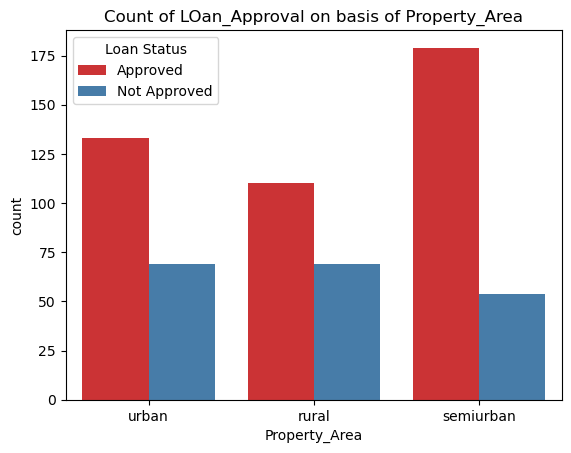

In [20]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPROVED ON BASIS OF property_area

print("Number of people who applied for loan and their property location:")
print(loan_data["Property_Area"].value_counts())
plt.title("Count of LOan_Approval on basis of Property_Area")
sns.countplot(x="Property_Area", hue="Loan_Status", data=loan_data, palette="Set1")
plt.legend(title="Loan Status", labels=["Approved", "Not Approved"])
plt.show()

number of people who applied for loan and their Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


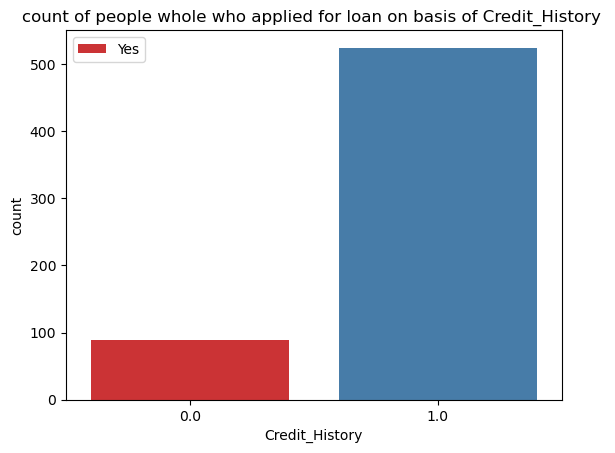

In [21]:
print("number of people who applied for loan and their Credit_History")
print(loan_data["Credit_History"].value_counts())
plt.title("count of people whole who applied for loan on basis of Credit_History ")
sns.countplot(x="Credit_History",data=loan_data,palette="Set1")
plt.legend(labels=["Yes","No"])

Number of people who applied for loan and their Credit_History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


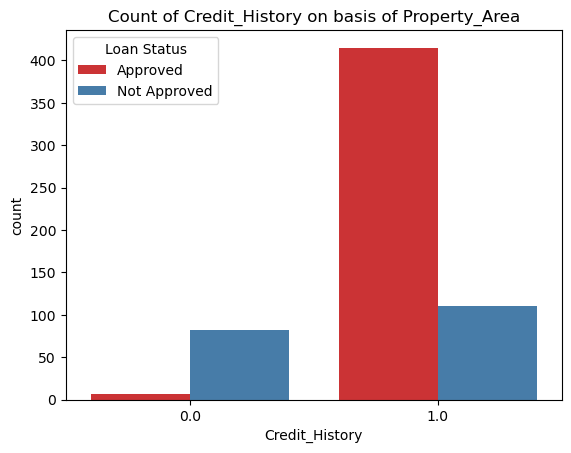

In [22]:
#THE USEFULNESS OF THIS CELL IS TO PLOT THE TOTAL COUNT OF LOANS_APPROVED ON BASIS OF Credit_History
print("Number of people who applied for loan and their Credit_History:")
print(loan_data["Credit_History"].value_counts())
plt.title("Count of Credit_History on basis of Property_Area")
sns.countplot(x="Credit_History", hue="Loan_Status", data=loan_data, palette="Set1")
plt.legend(title="Loan Status", labels=["Approved", "Not Approved"])
plt.show()

In [23]:
# THE USEFULNESS OF THIS CELL IS CREATE DICTIONARY OF NUMERIC COLUMN FOR CORRELATION

data_1={
    "Applicant_income":loan_data["ApplicantIncome"] , 
    "Coapplicant_income":loan_data["CoapplicantIncome"],
    "loan_amount":loan_data["LoanAmount"],
    "term_of_loan":loan_data["Loan_Amount_Term"],
    "credit_score":loan_data["Credit_History"],
      
    }
df= pd.DataFrame(data_1)

,Applicant_income,Coapplicant_income,loan_amount,term_of_loan,credit_score
Applicant_income,1.000000,-0.116605,0.565181,-0.045242,-0.018615
Coapplicant_income,-0.116605,1.000000,0.189218,-0.059675,0.011134
loan_amount,0.565181,0.189218,1.000000,0.039235,-0.000607
term_of_loan,-0.045242,-0.059675,0.039235,1.000000,0.000432
credit_score,-0.018615,0.011134,-0.000607,0.000432,1.000000


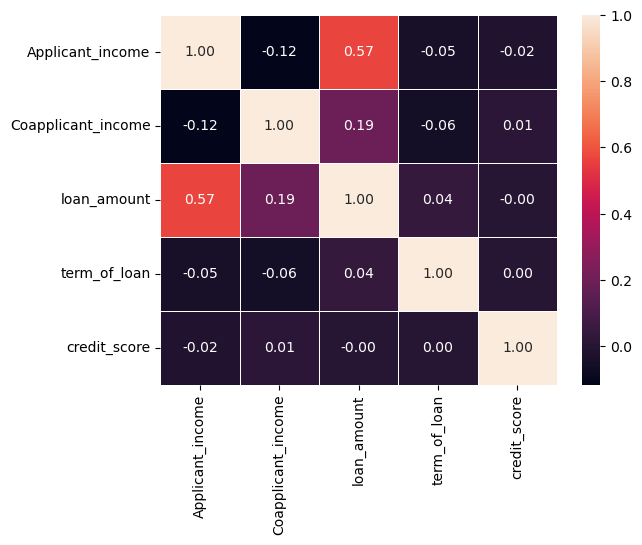

In [24]:
#THE USEFULNESS OF THIS CELL IS TO PLOT A CORRELATION TABLE AND PLOT HEATMAP OF CORRELATED DATA

corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',linewidth=0.5)
print(" ")
corr

In [25]:
#THE USEFULNESS OF THIS CELL IS TO COMBINE THE TWO INCOME COLUMNS TO SIMPLIFY UNDERSTANDING

loan_data["total_income"]=loan_data["ApplicantIncome"]+loan_data["CoapplicantIncome"]
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,semiurban,N,23809.0


In [26]:
#THE USEFULNESS OF THIS CELL IS TO REMOVE NOT REQUIRED COLUMNS

loan_data=loan_data.drop(["Loan_ID",'ApplicantIncome', 'CoapplicantIncome'],axis=1)

In [27]:
#THE USEFULNESS OF THIS CELL IS TO DISPLAY THE FIRST FEW ROWS OF DATA AND CONFIRM THE RESULT OF THE PREVIOUS ACTION PERFORMED

loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,urban,Y,6000.0


In [28]:
#THE USEFULNESS OF THIS CELL IS TO ASSIGN A NUMERIC VALUE TO NON_NUMERIC COLUMNS FOR BUILDING ML MODEL

cols=['Gender','Married',  'Education', 'Self_Employed','Property_Area', 'Loan_Status']
le=LabelEncoder()
for col in cols:
    loan_data[col]=le.fit_transform(loan_data[col])
    
loan_data['Dependents'] = loan_data['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})

In [29]:
#THE USEFULNESS OF THIS CELL IS TO DISPLAY THE FIRST  FEW ROWS OF DATA AND CONFIRM THE RESULT OF THE PREVIOUS ACTION PERFORMED

loan_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0
5,1,1,2,0,1,267.0,360.0,1.0,2,1,9613.0
6,1,1,0,1,0,95.0,360.0,1.0,2,1,3849.0
7,1,1,3,0,0,158.0,360.0,0.0,1,0,5540.0
8,1,1,2,0,0,168.0,360.0,1.0,2,1,5532.0
9,1,1,1,0,0,349.0,360.0,1.0,1,0,23809.0


In [30]:
# THE USEFULNESS OF THIS CELL IS TO GET INFORMATION OF WHOLE DATA ;i.e.TO KNOW TOTAL NUMBER OF ROWS AND COLUMNS
# TO KNOW THE COUNT OF NON_NULL VALUES AND THE DATA TYPE OF EACH COLUMN AND TO CONFIRM THE RESULT OF PREVIOUS ACTION PERFORMED

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int32  
 1   Married           614 non-null    int32  
 2   Dependents        614 non-null    int64  
 3   Education         614 non-null    int32  
 4   Self_Employed     614 non-null    int32  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int32  
 9   Loan_Status       614 non-null    int32  
 10  total_income      614 non-null    float64
dtypes: float64(4), int32(6), int64(1)
memory usage: 38.5 KB


In [31]:
# THE USEFULNESS OF THIS CELL IS TO know all the values that can be calculated from data
loan_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,145.752443,342.000000,0.855049,1.037459,0.687296,7024.705081
std,0.386497,0.476373,1.009623,0.413389,0.340446,84.107233,64.372489,0.352339,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4166.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,128.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,1.000000,7521.750000
max,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


In [32]:
#THE USEFULNESS OF THIS CELL IS TO ASSIGN VALUES INTO X AND y REQUIRED FOR ML MODEL

X=loan_data.drop(["Loan_Status"],axis=1)
y=loan_data["Loan_Status"]

In [33]:
#THE USEFULNESS OF THIS CELL IS TO BUILD ML MODEL BY TRAINING AND TESTING THE DATASET INTO MODEL BUILDING AND
# THEN FIT THE TRAINED DATA INTO MODEL AND THEN PREDICT THE VALUE OF y ON BASIS OF TESTED X DATA AND BUILD CONFUSION MATRIX AND
# PROVIDE CLASSIFICATION REPORT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)
print(" ")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print(" ")
print("Classification Report:",classification_report(y_test, y_pred))


Confusion Matrix:
 [[18 25]
 [ 1 79]]
 
Accuracy: 78.86178861788618
 
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [34]:
#THE USEFULNESS OF THIS CELL IS TO BUILD ML MODEL BY TRAINING AND TESTING THE DATASET INTO MODEL BUILDING AND
# THEN FIT THE TRAINED DATA INTO MODEL AND THEN PREDICT THE VALUE OF y ON BASIS OF TESTED X DATA AND BUILD CONFUSION MATRIX AND
# PROVIDE CLASSIFICATION REPORT

model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)
print(" ")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print(" ")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[23 20]
 [21 59]]
 
Accuracy: 66.66666666666666
 
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53        43
           1       0.75      0.74      0.74        80

    accuracy                           0.67       123
   macro avg       0.63      0.64      0.64       123
weighted avg       0.67      0.67      0.67       123



In [35]:
#THE USEFULNESS OF THIS CELL IS TO KNOW THE R_2 SCORE AND MEAN_SQUARED_ERROR
# MSE measures the average of the squared differences between predicted and actual values
# R-squared is valuable for understanding the overall fit of the model,

predictions=model_1.predict(X)
print("R square score :\n ",r2_score(y,predictions))
print("")
print("MSE :\n ",mean_squared_error(y,predictions))

R square score :
  0.6893019352290679

MSE :
  0.06677524429967427


In [36]:
#THE USEFULNESS OF THIS CELL IS TO BUILD ML MODEL BY TRAINING AND TESTING THE DATASET INTO MODEL BUILDING AND
# THEN FIT THE TRAINED DATA INTO MODEL AND THEN PREDICT THE VALUE OF y ON BASIS OF TESTED X DATA AND BUILD CONFUSION MATRIX AND
# PROVIDE CLASSIFICATION REPORT

model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)
print(" ")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print(" ")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[18 25]
 [ 3 77]]
 
Accuracy: 77.23577235772358
 
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [37]:
#THE USEFULNESS OF THIS CELL IS TO BUILD ML MODEL BY TRAINING AND TESTING THE DATASET INTO MODEL BUILDING AND
# THEN FIT THE TRAINED DATA INTO MODEL AND THEN PREDICT THE VALUE OF y ON BASIS OF TESTED X DATA AND BUILD CONFUSION MATRIX AND
# PROVIDE CLASSIFICATION REPORT

model_3 = KNeighborsClassifier()
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)
print(" ")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print(" ")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 5 38]
 [18 62]]
 
Accuracy: 54.47154471544715
 
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.12      0.15        43
           1       0.62      0.78      0.69        80

    accuracy                           0.54       123
   macro avg       0.42      0.45      0.42       123
weighted avg       0.48      0.54      0.50       123



In [38]:
#THE USEFULNESS OF THIS CELL IS TO BUILD ML MODEL BY TRAINING AND TESTING THE DATASET INTO MODEL BUILDING AND
# THEN FIT THE TRAINED DATA INTO MODEL AND THEN PREDICT THE VALUE OF y ON BASIS OF TESTED X DATA AND BUILD CONFUSION MATRIX AND
# PROVIDE CLASSIFICATION REPORT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_4 = StandardScaler()
X_train_scaled = model_4.fit_transform(X_train)
X_test_scaled = model_4.transform(X_test)

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",conf_matrix)
print(" ")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print(" ")

print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[18 25]
 [ 1 79]]
 
Accuracy: 78.86178861788618
 
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [39]:
#THE USEFULNESS OF THIS CELL IS TO KNOW THE TOTAL COUNT OF LOANS_APPROVED

print("Count of approved and not approved loan")
print(loan_data["Loan_Status"].value_counts())

Count of approved and not approved loan
Loan_Status
1    422
0    192
Name: count, dtype: int64


### Machine model checking

In [45]:
input_data = pd.DataFrame({
    'Gender': [0],
    'Married':[1],
    'Dependents':[0],
    'Education':[1],
    'Self_Employed':[1],
    'LoanAmount': [15000],
    'Loan_Amount_Term':[360],
    'Credit_History': [1],
    'Property_Area':[2],
    'total_income': [55000],
    
})

# Make a prediction
predictions = model.predict(input_data)

# Print the prediction
print(f'Predicted loan status: {predictions[0]}')


Predicted loan status: 0


In [41]:
input_data = pd.DataFrame({
    'Gender': [1],
    'Married':[0],
    'Dependents':[3],
    'Education':[1],
    'Self_Employed':[1],
    'LoanAmount': [15000],
    'Loan_Amount_Term':[360],
    'Credit_History': [1.0],
    'Property_Area':[2],
    'total_income': [55000],
    
})

# Make a prediction
predictions = model.predict(input_data)

# Print the prediction
print(f'Predicted loan status: {predictions[0]}')


Predicted loan status: 0


In [42]:
input_data = pd.DataFrame({
    'Gender': [1],
    'Married':[1],
    'Dependents':[3],
    'Education':[0],
    'Self_Employed':[0],
    'LoanAmount': [15000],
    'Loan_Amount_Term':[360],
    'Credit_History': [0.0],
    'Property_Area':[0],
    'total_income': [55000],
    
})

# Make a prediction
predictions = model.predict(input_data)

# Print the prediction
print(f'Predicted loan status: {predictions[0]}')


Predicted loan status: 0


## CONCLUSIONS FROM DATA

In [1]:
import os
notebook_path = os.path.abspath("loan_analysis_ml.ipynb")
print(notebook_path)

C:\Users\user\Documents\jupyter files\loan_analysis_ml.ipynb
